# Taller en Clase 1

### Estudiantes:
- Beycker Agredo
- Catalina Agudelo
- Diana Arias
- Jaime Arismendi
- Nicolas Orozco

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

## Descripción y Limpieza

In [3]:
url = "https://raw.githubusercontent.com/armandoordonez/eda_couse/main/data/Car_details_v3.csv"
headers = ['name','year','selling_price','km_driven','fuel,seller_type','transmission','owner','mileage','engine','max_power','torque','seats']
data = pd.read_csv(url)
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [4]:
data.shape

(8128, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
data["engine"] = data["engine"].astype(str).apply(lambda x: str(x.split()[0])).astype(float)
data["mileage"] = data["mileage"].astype(str).apply(lambda x: str(x.split()[0])).astype(float)
data["max_power"] = data["max_power"].astype(str).apply(lambda x: str(x.split()[0]))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      8128 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 825.6+ KB


In [7]:
data["max_power"].replace('bhp', np.nan, inplace=True)
data["max_power"] =data["max_power"].astype(float)
data["mileage"].replace(0, np.nan, inplace=True)

In [8]:
data.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,8128.000000,8.128000e+03,8.128000e+03,7890.000000,7907.000000,7912.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.460624,1458.625016,91.517919,5.416719
std,4.044249,8.062534e+05,5.655055e+04,3.939457,503.916303,35.822499,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,9.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.330000,1248.000000,82.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [9]:
avg_mileage = data["mileage"].mean()
avg_engine = data["engine"].mean()
avg_max_power = data["max_power"].mean()

In [10]:
data["mileage"].replace(np.nan, avg_mileage, inplace=True)
data["engine"].replace(np.nan, avg_engine, inplace=True)
data["max_power"].replace(np.nan, avg_max_power, inplace=True)
data["seats"].replace(np.nan, 5.0, inplace=True)

In [11]:
data.drop(columns="name", inplace= True)

In [12]:
data.drop(columns="torque", inplace= True)

## Relaciones

In [13]:
data.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,8128.000000,8128.000000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.460624,1458.625016,91.517919,5.405389
std,4.044249,8.062534e+05,5.655055e+04,3.881345,497.017504,35.343246,0.948874
min,1983.000000,2.999900e+04,1.000000e+00,9.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.800000,1197.000000,68.100000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.460624,1248.000000,83.100000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.277500,1582.000000,101.250000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [14]:
data_cuant = data[["year","selling_price", "km_driven", "mileage","engine","max_power", "seats"]]

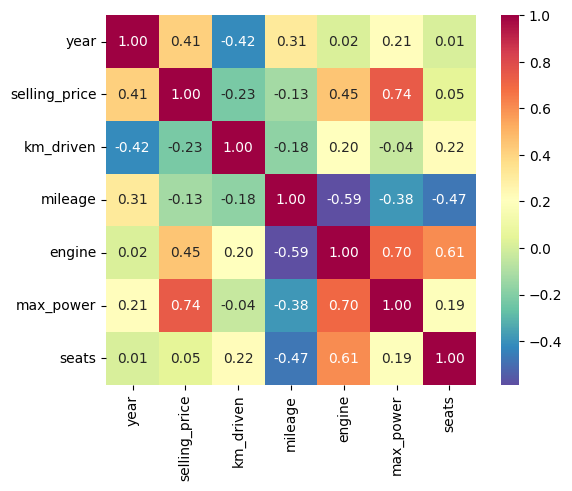

In [15]:
corrmat = data_cuant.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=data_cuant.columns, 
                 xticklabels=data_cuant.columns, 
                 cmap="Spectral_r")
plt.show()

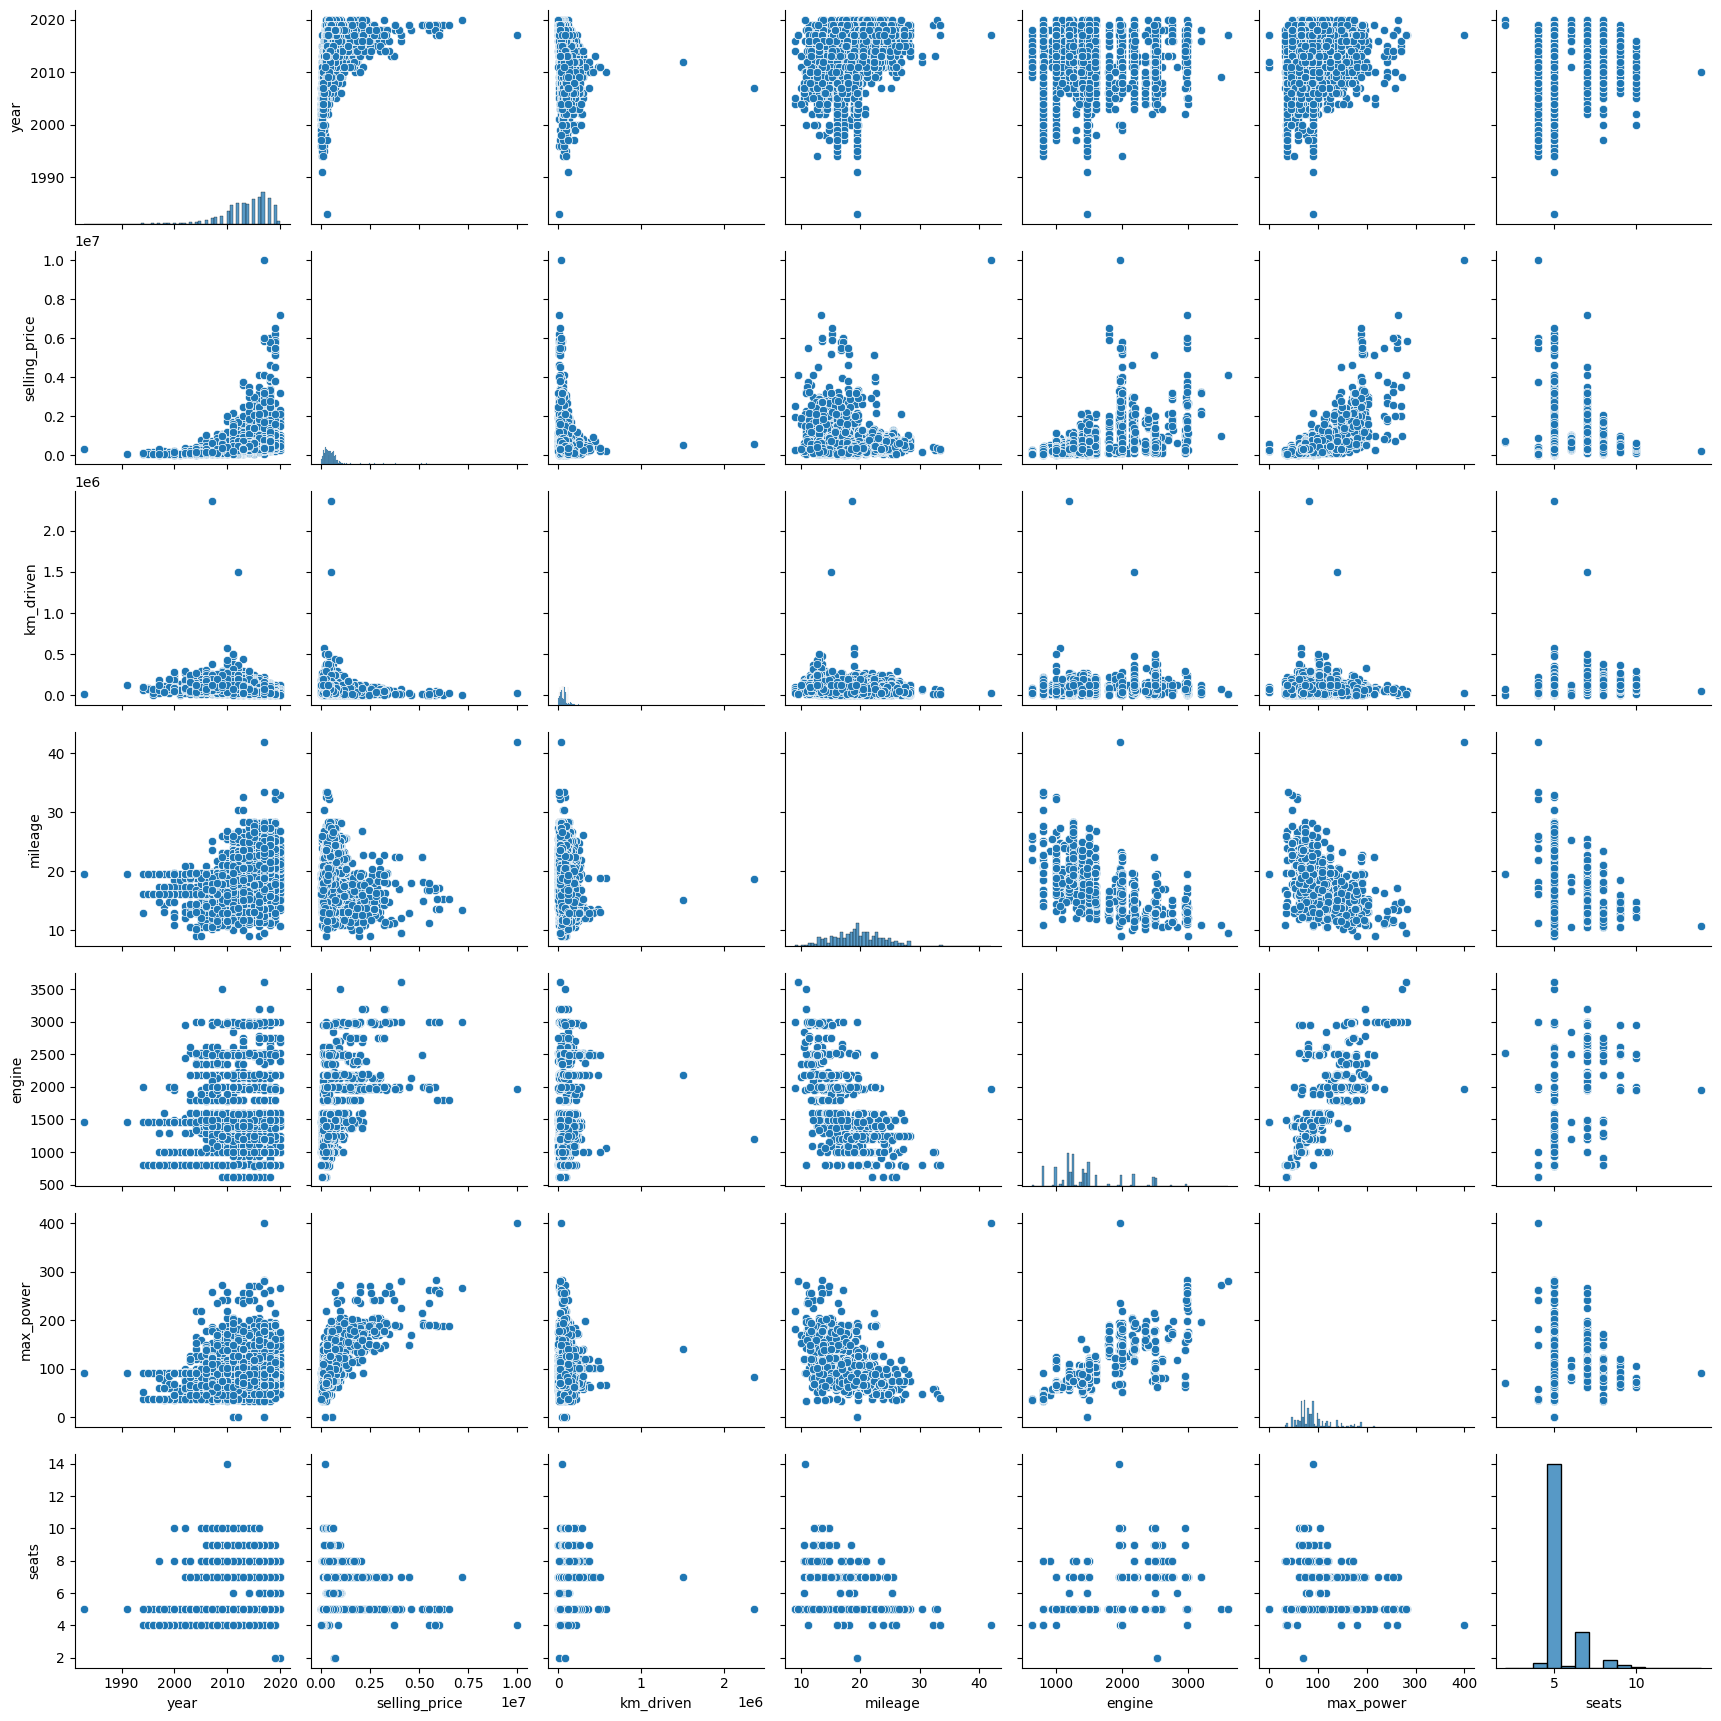

In [16]:
sns.pairplot(data_cuant)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        8128 non-null   float64
 8   engine         8128 non-null   float64
 9   max_power      8128 non-null   float64
 10  seats          8128 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 698.6+ KB


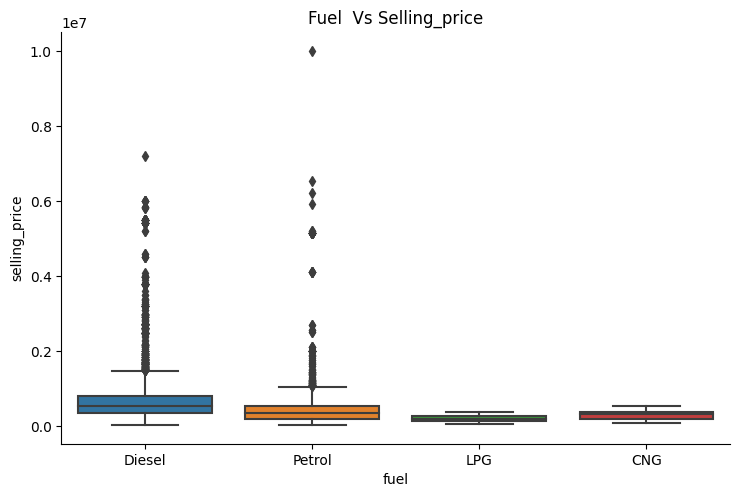

In [27]:
sns.catplot(x="fuel", y="selling_price", data=data, kind="box", aspect=1.5)
plt.title("Fuel  Vs Selling_price")
plt.show()

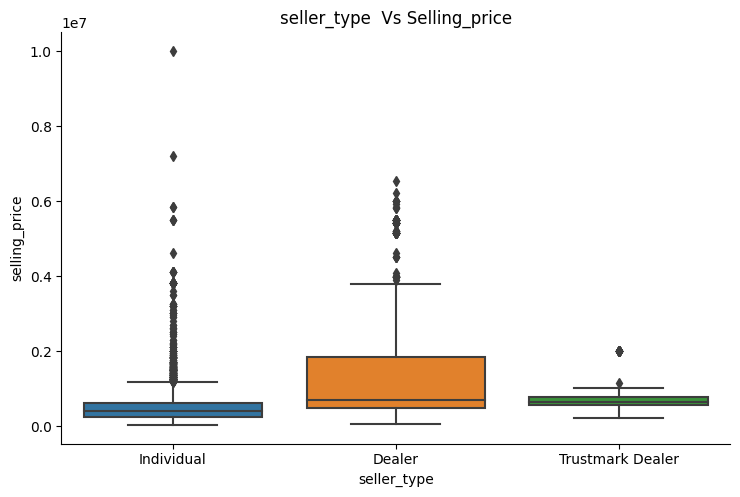

In [24]:
sns.catplot(x="seller_type", y="selling_price", data=data, kind="box", aspect=1.5)
plt.title("seller_type  Vs Selling_price")
plt.show()

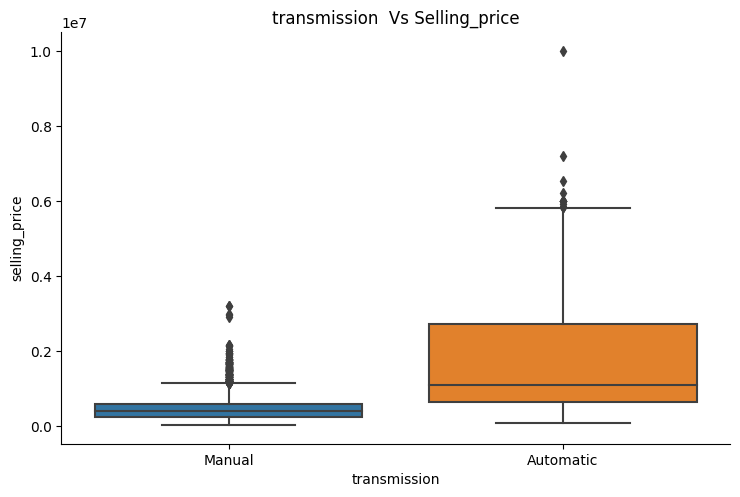

In [25]:
sns.catplot(x="transmission", y="selling_price", data=data, kind="box", aspect=1.5)
plt.title("transmission  Vs Selling_price")
plt.show()

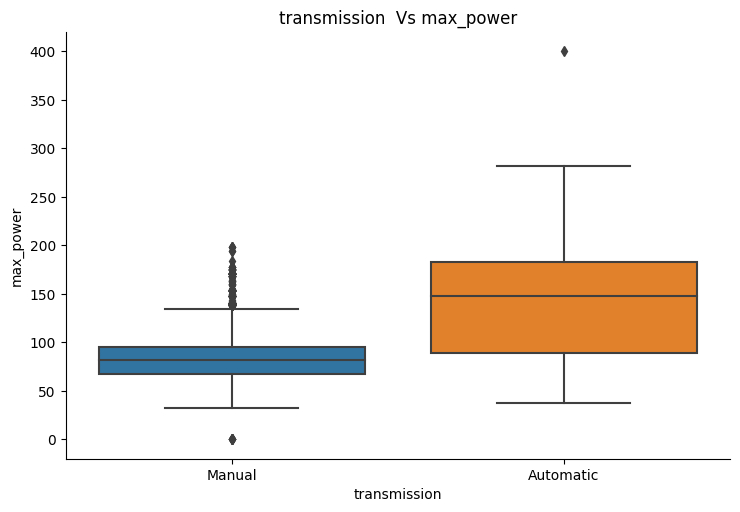

In [26]:
sns.catplot(x="transmission", y="max_power", data=data, kind="box", aspect=1.5)
plt.title("transmission  Vs max_power")

plt.show()

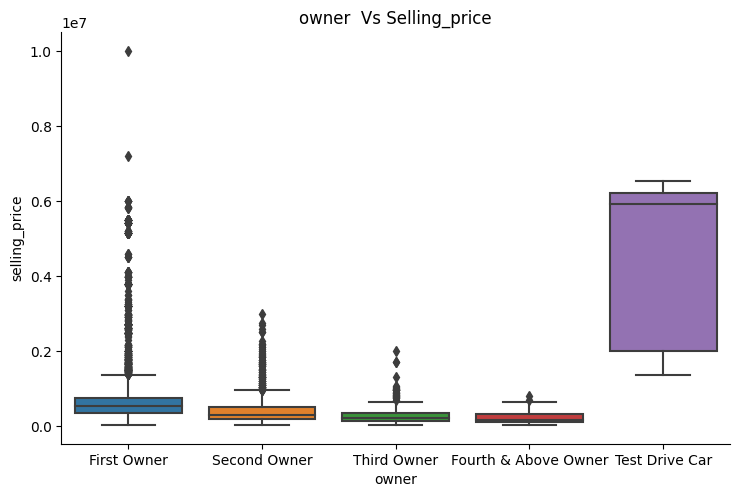

In [22]:
sns.catplot(x="owner", y="selling_price", data=data, kind="box", aspect=1.5)
plt.title("owner  Vs Selling_price")
plt.show()

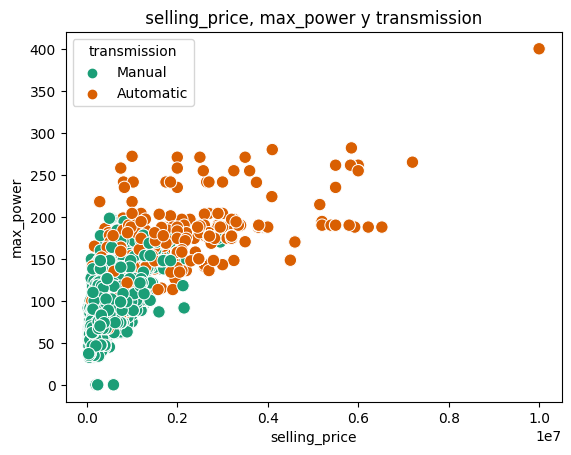

In [23]:
sns.scatterplot(x="selling_price", y="max_power", hue="transmission", data=data, palette="Dark2", s=80)
plt.title(" selling_price, max_power y transmission ")
plt.show()

## Conclusiones

Según el gráfico de correlación se puede observar lo siguiente:
-	El motor o tamaño del motor de un automóvil (engine) medido en CC, presenta una correlación positiva fuerte con la potencia máxima (max_power)
- La variable 'selling_price' tiene una correlación positiva fuerte con 'max_power'
- Presenta igualmente una correlación positiva debil con 'engine'

De las gráficas de cajas concluimos que:
- En la comparación entrela cantidad de propietarios que ha tenido un carro con su precio de venta, se observa que entre más propietarios ha tenido un auto, su precio de venta se reduce. Y así mismo que aquellos autos utilizados como Test driver tienen un precio mucho más alto que los que han tenido uno o más dueños.
- Comparando el tipo de vendedor y el precio, evidenciamos que aquellos autos vendidos por un intermediario son mucho más caros que aquellos vendidos por el dueño individual o por un vendedor autorizado.
- Según el tipo de combustible vs el precio, se encuentra una tendencia a que los autos de Diesel son más caros que aquellos que utilizan cualquier otro tipo de combustible.

Del gráfico de dispersión, se observa que el tipo carro de transmission automático presenta mayor poder que el manual, pero también un precio de venta más alto